In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Linear Regression.xlsx")
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
data.shape

(21613, 5)

In [4]:
data.size

108065

In [5]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [7]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C3CD064F48>,
      dtype=object)

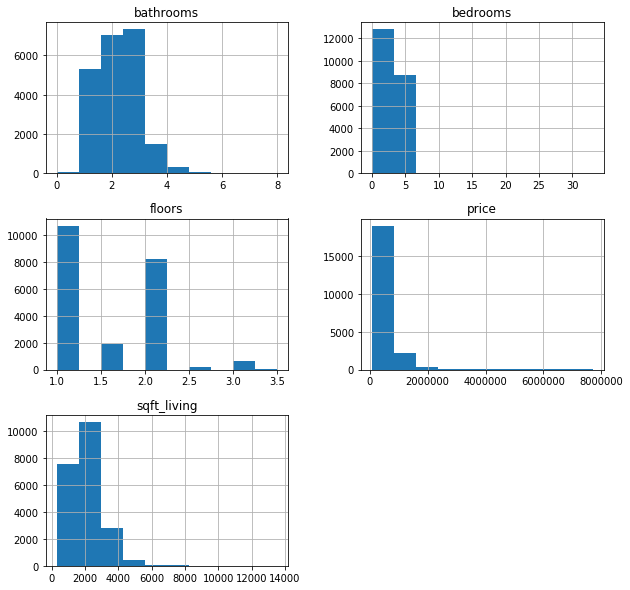

In [8]:
data.hist(figsize=(10,10))

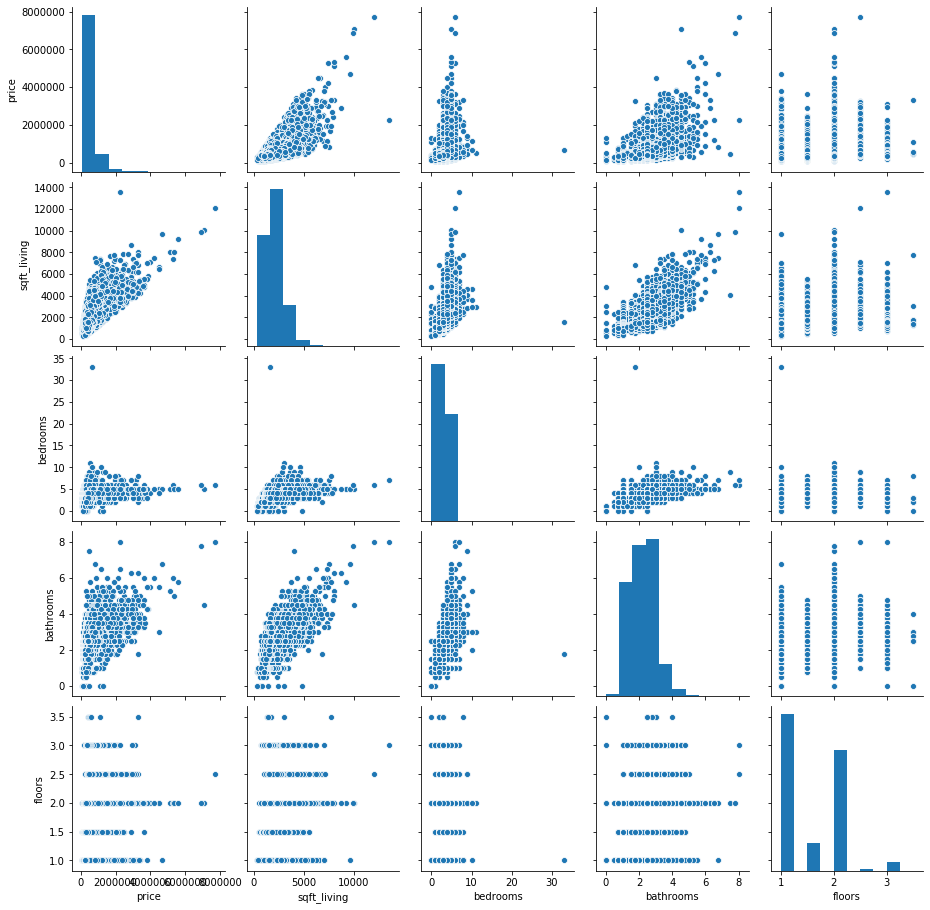

In [9]:
sns.pairplot(data)

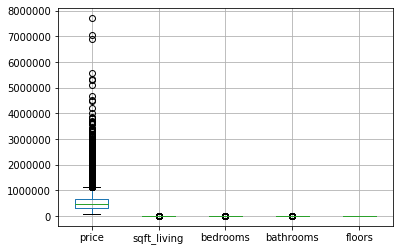

In [10]:
data.boxplot()

# Model

In [11]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


In [12]:
x = data[['sqft_living','bedrooms','bathrooms','floors']]
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [13]:
y= data[['price']]
y.tail()

,price
21608,360000
21609,400000
21610,402101
21611,400000
21612,325000


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [15]:
data.shape

(21613, 5)

In [16]:
x_train.shape

(16209, 4)

In [17]:
x_test.shape

(5404, 4)

In [18]:
y_train.shape

(16209, 1)

In [19]:
y_test.shape

(5404, 1)

# Train the regression model by calling linear regression from sklearn

In [20]:
from sklearn.linear_model import LinearRegression
mul_reg = LinearRegression()

In [21]:
mul_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Train

In [22]:
mul_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test the model

In [23]:
ypred = mul_reg.predict(x_test)
ypred

array([[607674.9583261 ],
       [583856.94284837],
       [415936.27946441],
       ...,
       [533188.7734709 ],
       [516048.79857589],
       [336717.4769497 ]])

In [24]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [25]:
data.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


# How do yo forcast pricing by training the model

In [26]:
unseen_pred = mul_reg.predict(np.array([[2310,4,2.50,2.0]]))
print("The price of the home with resp to sqft_living , bedrooms, bathrooms, floors is : ",unseen_pred)

The price of the home with resp to sqft_living , bedrooms, bathrooms, floors is :  [[579627.47696297]]


# Evolution of Model

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
print("The R-square ...", r2_score(y_test,ypred))
print("The RMSE value ...",np.sqrt(mean_squared_error(y_test,ypred)))

The R-square ... 0.5152390217740295
The RMSE value ... 267619.1189755923
